In [ ]:
# ------------------------Importing packages---------------------------------------------
import numpy as np
%matplotlib inline 
from matplotlib import pyplot as plt

#packages for the gui
import tkinter as tk
#import matplotlib canvas for tkinter
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, NavigationToolbar2Tk)
# Implement the default Matplotlib key bindings.
from matplotlib.backend_bases import key_press_handler
from matplotlib.figure import Figure
#font definitions
import tkinter.font as font
helv36 = font.Font(family='Helvetica', size=36, weight='bold') # font type

#-------------------------------------------------------------------------------------------

In [96]:
#----------------------FUNCTIONS--------------------------------------

def CREATE_FIELD(n):
    '''Creates an n by n array of numbers represening the plane where the ant moves'''
    return np.ones((n,n))  #white sites corresponding to ones blacks to zeros

#data structure state dict has 2 elements: pos, direc : state={"pos" : np.array([i,j]), "direc" : np.array([0,1])}

def MOVE(state,col):
    '''Takes the position (pos) and the heading (int) of the ant in the plane and takes one step accoring to the rules 
    modifying the color of the site in the plane (field) giving back the new heading and coordinates '''
    #pos: array of coordinates [x,y]
    #direc array of a unit legnght direction vector {vx,vy}
    #col: color of the location of the ant 1 (white) 0 (black)
    #R: rotation matrix to determine the direction (clockvise)
    R = np.array([[0,1],[-1,0]])
    L = np.array([[0,-1],[1,0]])
    
    pos = state["pos"]
    direc = state["direc"]
    
    #if the site the ant is in is 1 (white) ant turns 90 right 
    if (col):
        direc = np.matmul(R,direc) # update direction
    #if the site the is in is 0 (black) ant turns 90 left 
    else:
        direc = np.matmul(L,direc) # update direction
    
    #after turn the ant moves forward   
    pos = pos + direc # upadate position
    
    #new state
    nstate={"pos" : pos, "direc" : direc}
    
    return(nstate)

def ITER(N,n):
    '''Iterates the langtons ant returnd the field as the result of the ants path. The ant starts from the middel facing north.'''
    # N size of the plane in cells
    # n number of iterations
    
    field = CREATE_FIELD(N)  #create the plane where the ant moves
    pos1=np.array([round(N/2),round(N/2)])  # starting position is in the middle
    direc1 = np.array([0,1])  # starting direction is to the north
    state={"pos" : pos1, "direc" : direc1}   
    
    #iterating the ant n times
    for i in range(n):
        x = state["pos"][0]
        y = state["pos"][1]
        
        #check that wether or not the new position is outside the plane
        if ( (x < 0)  or (y < 0)  or  (x > (N-1))  or (y > (N-1)) ):
            # iteration is stopped when the edge of the plane is reached
            break
            
        field[x][y] = 1 - field[x][y] #the cell changes from 0 to 1 or 1 to 0 where the ant moves from 
        state = MOVE(state,field[x][y])  #calculating the next ant state
    
    return(field,i)
#-------------------------------------------------------------------------

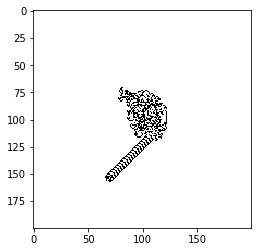

In [24]:
field2 = ITER(200,12000)
plt.imshow(field2, cmap='gray')
plt.show()

In [133]:
# --------------------functions for buttion clicks--------------------------
def clicked():
    N = int(inputfield_size.get())
    n = int(inputfield_step.get())
    (field,itnum) = ITER(N,n)
    txt.delete(1.0, tk.END)
    txt.insert(0.0,"Number of " +"\n" + "succesfull iterations : " +"\n"+ str(itnum+1))
    pic.imshow(field, cmap='gray')
    canvas.draw()
    
        

#--------------------------------------------------------------------------------

#Cretae window object
win = tk.Tk()
win.title("Langton")

# the window is separated into sections
left_fr =tk.Frame(win,width=400, height = 600)
left_fr.grid(row=0, column=0)
right_fr =tk.Frame(win,width=800, height = 600)
right_fr.grid(row=0, column=1)
btn_fr = tk.Frame(left_fr, width = 150, height = 200)
btn_fr.grid(columnspan=2,row =2)
txt_fr = tk.Frame(left_fr, width = 150, height = 200)
txt_fr.grid(columnspan=2,row =4)

#left panel input fields

lbl = tk.Label(left_fr, text="Field size :")
lbl.grid(column=0, row=0,padx = 10, pady = 2,sticky =tk.E)

inputfield_size = tk.Entry(left_fr,width = 12)
inputfield_size.grid(column=1, row=0,padx = 10, pady = 2)

lbl = tk.Label(left_fr, text="Iteration number :")
lbl.grid(column=0, row=1,padx = 10, pady = 2,sticky =tk.E)

inputfield_step = tk.Entry(left_fr,width = 12)
inputfield_step.grid(column=1, row=1,padx = 10, pady = 2)

#left panel button
btn = tk.Button(btn_fr, text="Run",command = clicked)
btn.grid(column=0, row=0,padx = 10, pady = 2)
btn['font'] = helv36

#left panel info field
txt = tk.Text(txt_fr,width=25, height=5, takefocus=0)
txt.grid(column=0, row=0,padx = 10, pady = 2)
txt.insert(0.0, "Text to insert")


#right panel figure
#create figure
fig = Figure(figsize=(8, 6), dpi=100) 
pic = fig.add_subplot(111)

# A tk.DrawingArea
canvas = FigureCanvasTkAgg(fig, master=right_fr)
canvas.draw()
canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

#adding toolbar
toolbar = NavigationToolbar2Tk(canvas, right_fr)
toolbar.update()
canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

#run the window
win.mainloop()


In [86]:
def g(x,y):
    return(x,y)

In [128]:
(a,b) = g(1,2)
a

1

In [90]:
(np.zeros(3),2)[0]

array([0., 0., 0.])

In [126]:
"hjl"+str(3)

'hjl3'